<a href="https://colab.research.google.com/github/FrancescoInnocenti/Visualising_Psychological_Data_in_Python/blob/main/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊📈 **Visualising Psychological Data in Python: A Tutorial** 📉📊

This notebook provides a friendly and practical introduction to producing **publication-quality figures** for psychological data in Python, with no installations required. There are many resources for learning how to plot data in Python, but to my knowledge no specific tutorial for psychologists, especially undergraduate students who might be interested in getting some experience with coding. This notebook is intended to be highly accessible, with this audience in mind, but anyone interested in visualising psychological data in Python can learn from it. ***No previous coding experience is assumed or needed*** to follow the tutorial, and you can create your own figures by tweaking the code given.

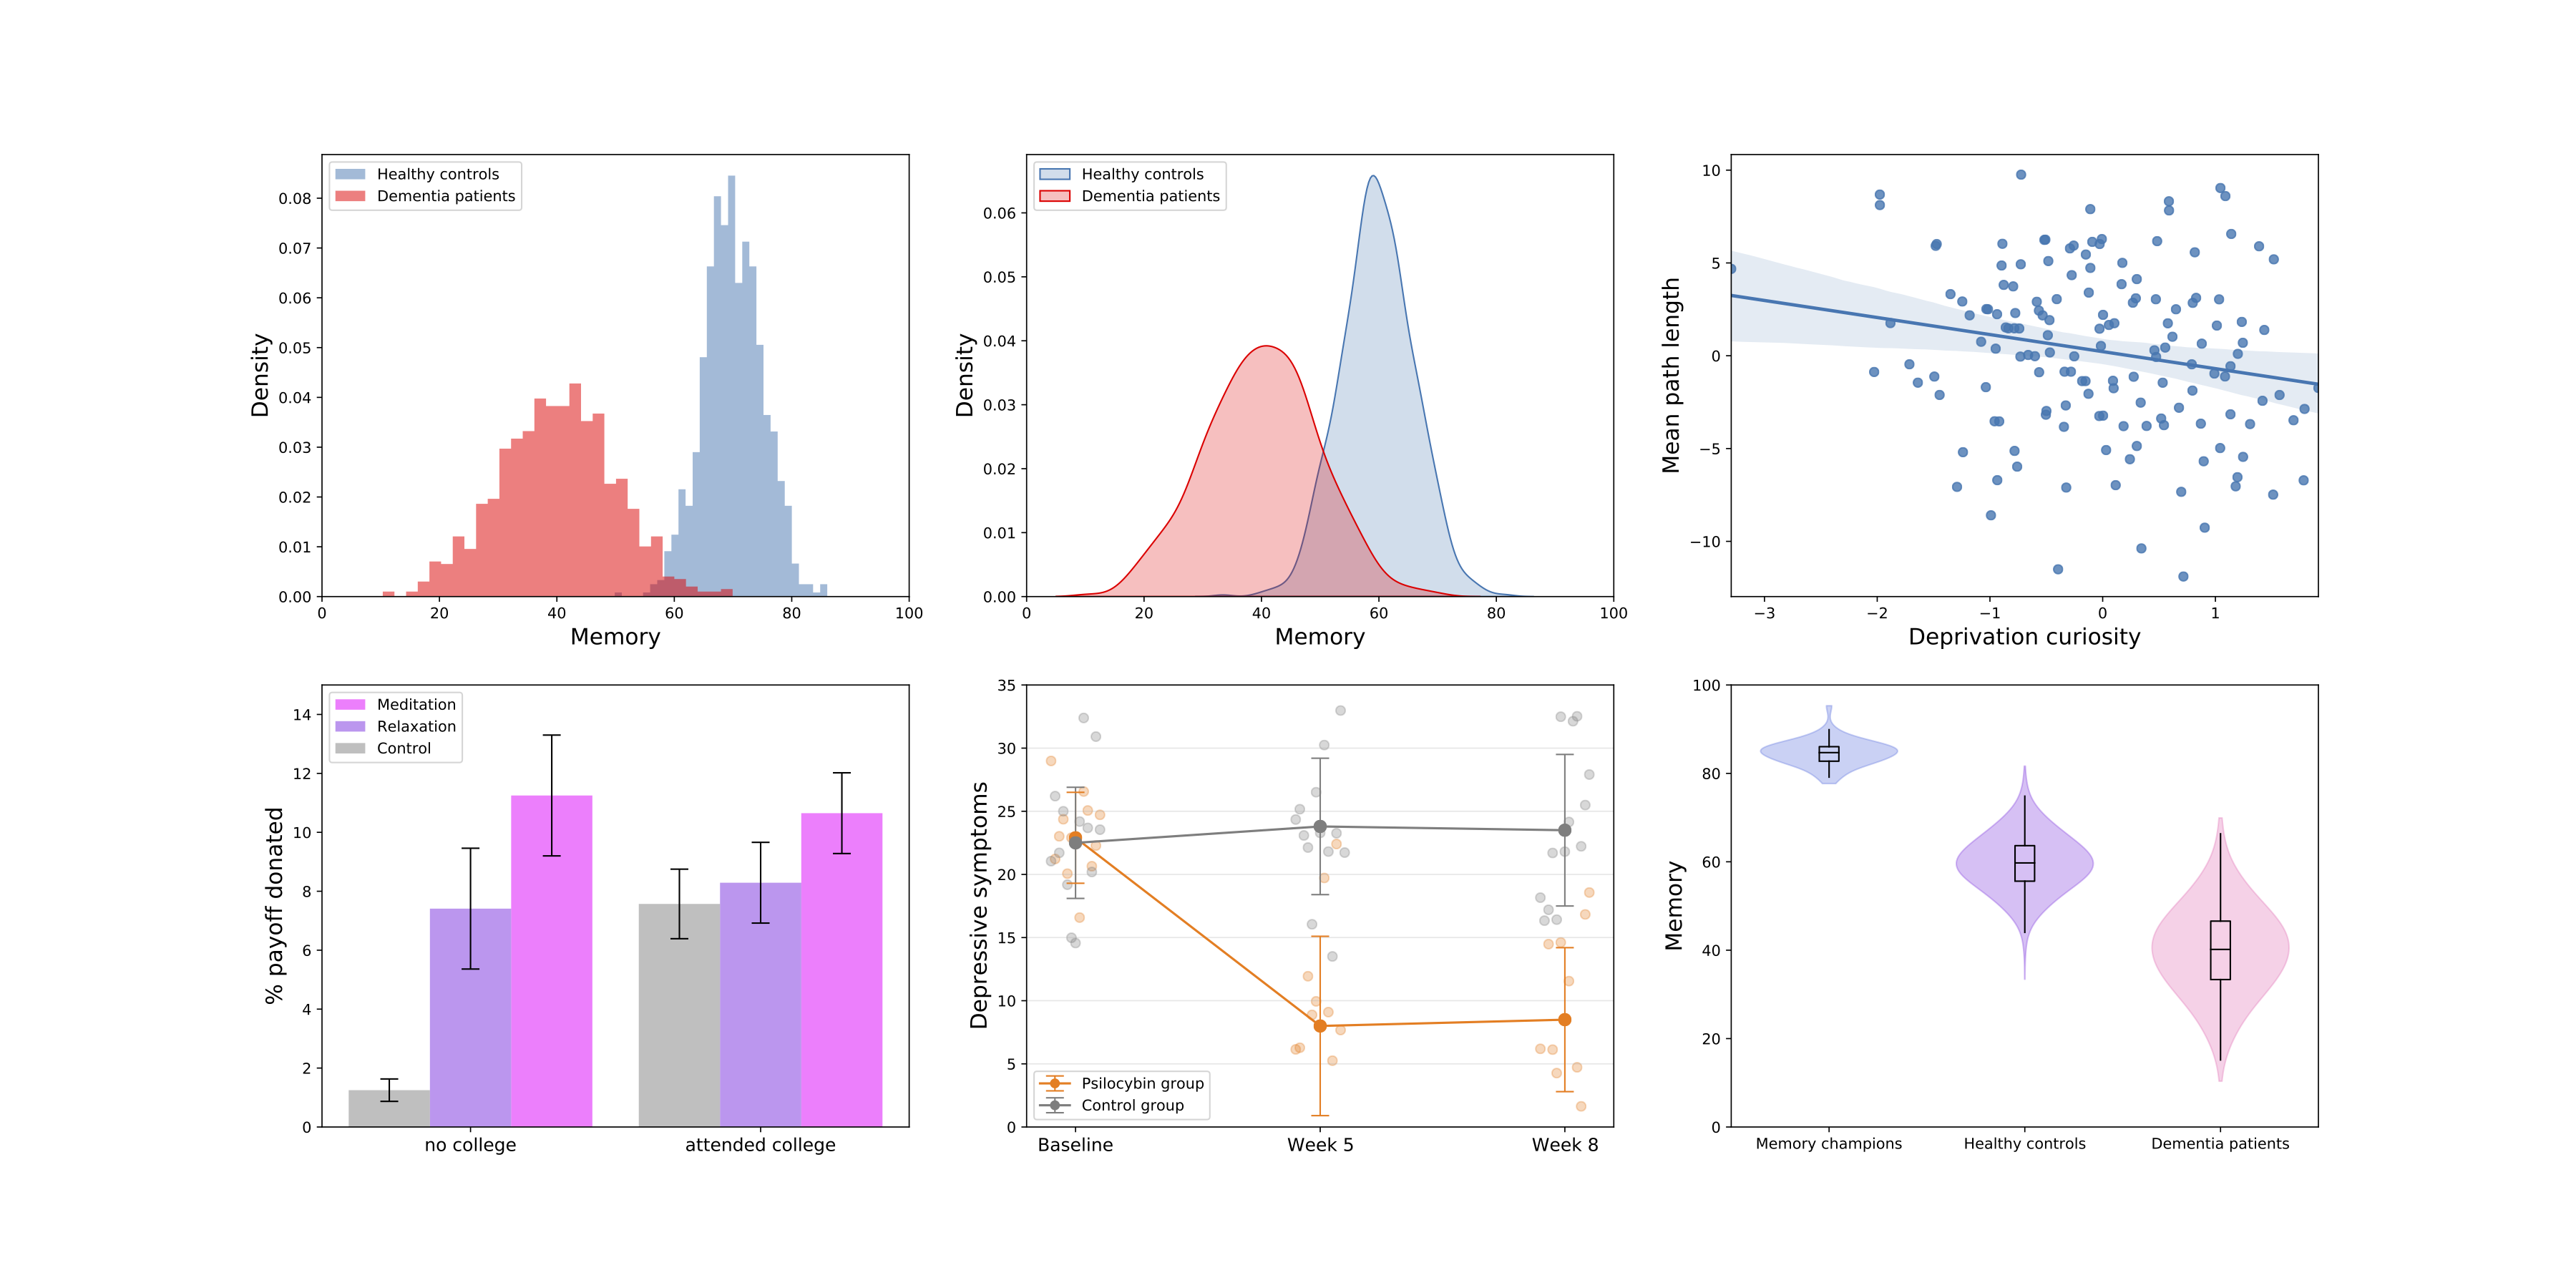

The notebook walks you through all the basic steps to producing visualisations, from loading Excel files to exporting your figure. We cover many graphs commonly seen in psychological research, including histograms, density plots, scatterplots, bar plots, line plots, and violin plots. When considering scatterplots, we also look at how to make multipanel figures, i.e. figures with multiple embedded plots or subplots. In addition, because certain plots rely on specific experimental designs, under the bar plot section we look at how to code your own factorial design, with as many variables and levels as needed.

To make the tutorial more engaging, some interactive visualisations are included, and many plots are demonstrated with data from recently published studies in the behavioural sciences.

If you have any further suggestions for this notebook, feel free to get in touch: finno001@gold.ac.uk

---

## **Tutorial overview**

1. [Setting up our coding environment](#Coding_environment)
2. [Loading Excel files](#Loading_Excel_files)
3. [Basic data indexing](#Data_indexing)
4. [Visualisations](#Visualisations)
  * [Histograms](#Histograms)
  * [Density plots](#Density_plots)
  * [Scatterplots](#Scatterplots)
  * [Bar plots](#Bar_plots)
  * [Line plots](#Line_plots)
  * [Violin plots](#Violin_plots)
  
  
5. [Exporting your figure](#Exporting)
* [Further resources](#Further_resources)


Whether or not your have previous experience with Python, you should start from Step 1. This introduces and sets up a coding environment in which to create our visualisations.

The next step depends on whether you want to visualise individual observations (e.g. in a scatterplot) *and* whether you know the basics of Python. If you want to plot data points and have never worked with Python, you should continue with Step 2 and 3. These explain how to load data from Excel files and access variables of interest. If you do know the basics of Python, including how to load files and index data, then you can skip to the visualisations (Step 4). You can also skip to Step 4 if you are interested in plotting only summary statistics such as means and standard deviations (e.g. in a bar graph). The visualisations can be read independently of each other, but because they are organised roughly from less to more complicated, you might want to work through them in the given order.

Step 5 explains how to save and export your figures. Some further resources are provided at the end of the notebook.

>**IMPORTANT**
* Every time you launch a new session with the notebook, import the key packages in Step 1 and run all the cells in the Visualisations section to avoid errors.
* To save your changes to the document, make a copy of this Colab by clicking on *File* and then *Save a copy in Drive*.

---

<a name="Coding_environment"></a>
## 1. **Setting up our coding environment**

To make our figures, we need a programming environment, a place where we can write code. The environment is to a programmer what the kitchen is to a chef, the battlefield to a soldier, the laboratory to a scientist - you get the idea...

This notebook was created in an environment called [Jupyter Notebook](https://jupyter.org). Jupyter Notebook is a web-based, interactive application, allowing us to display live code, text, equations, and visualisations in a single document. Notebooks are made of two types of cell or block: text cells and code cells. Text cells like this one contain, well, text. Code cells like the following contain (you guessed it) code.

In [ ]:
print('Hello world')

Hello world


Code cells are distinguished by a light grey background.

You are reading this notebook in [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb#), or "Colab" for short. Colab allows you to see, share, and modify  notebooks without having to download or install anything - it's basically a host service for Jupyter Notebook. The notebooks are stored on Google Drive and can be shared like any other Google Doc.

Before we can start coding, we need to `import` some key packages. If the coding environment is our kitchen, packages are our cooking utensils. Or if you think of the coding environment as our battlefield, packages are our weapons - OK no more analogies! For making our graphs, we will need the following two key packages. To import them, run the code in the cell below by clicking on the encircled triangle (▶) on the top left of the cell, between the square brackets (it appears when you hover over the cell).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

[NumPy](https://numpy.org) stands for ''Numerical Python'' and is the basic package for creating and manipulating data arrays (i.e. vectors and matrices). [Matplotlib](https://matplotlib.org) is a library with a variety of visualisation tools. The command `as` allows us to call these packages with shorthands so that we don't need to rewrite them in their entirety every time we use them.

The following line of code allows us to display all the plots in this notebook.

In [ ]:
%matplotlib inline

Now that we have set up a programming environment, we are ready to code!

---

<a name="Loading_Excel_files"></a>
## 2. **Loading Excel files**

For plots requiring many data points, you should load your data into the notebook. The data will be stored in some type of file, such as a text file. Here we will look at how to load Excel files (with extension .xlsx), as Excel is one of the most common softwares used to store data.

First you need to upload the file on Colab. You can do this without writing any code by clicking first on the folder icon (📁) on the left tab of this document and then on the icon with an up arrow (⬆️) printed on a white document (📄).

Once we have uploaded our file into Colab, we import [Pandas](https://pandas.pydata.org), a data manipulation package built on top of NumPy that can read different types of file. We didn't import pandas before because we will use it only here in this notebook.

In [ ]:
import pandas as pd

We then pass the name of the file to the pandas function `pd.read_excel`. Here we load an Excel file I created (named 'example_dataset'), with data for 10 participants just to keep things simple. You can change the name of the file to load your own data from an Excel file loaded into Colab. The function `print` displays the data.

In [ ]:
# load Excel file into a variable called data
data = pd.read_excel('example_dataset.xlsx')

# display data
print(data)

   Participant ID Gender  Age  Memory score
0               1      F   21            56
1               2      F   33            34
2               3      M   28            74
3               4      F   34            58
4               5      F   45            43
5               6      M   23            67
6               7      F   39            54
7               8      F   46            36
8               9      M   52            56
9              10      F   34            59


>**Note**: this symbol `#` introduces a comment or annotation that is not treated as code. Comments are useful for keeping track of what your code is doing as well as for other people who might want to examine and use your code.

Note also that pandas reads the first row of the Excel spreadsheet as headings or column names and adds row indices, starting from 0.

---

<a name="Data_indexing"></a>
## 3. **Basic data indexing**

If you loaded your data into the notebook, you will probably need indexing to make a plot. Indexing is about accessing pieces of your data, similar to finding books in a library. Psychological datasets typically consist of participants as rows and variables as columns. For this reason, whenever we want to plot any number of variables, we first need to access or extract the corresponding columns - in other words, we need indexing.

Let's work with our example file (see the data at the end of the [previous section](#Loading_Excel_files)) and suppose we wanted to access the memory score of each participant (i.e. all the rows of the fourth column). There are a number of ways to to do this; the most convenient is to specify the name of the column we wish to extract in square brackets, as follows.

In [ ]:
# extract memory scores in a variable called memory data
memory_data = data['Memory score']

# display memory data
print(memory_data)

0    56
1    34
2    74
3    58
4    43
5    67
6    54
7    36
8    56
9    59
Name: Memory score, dtype: int64


Once you have extracted the variable you want, you can plot it. Let's try a simple histogram.

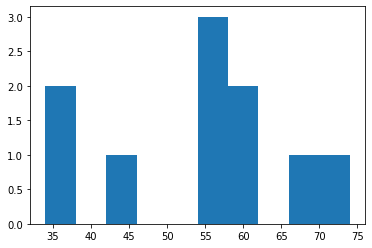

In [ ]:
# plot memory data in a histogram
plt.hist(memory_data);

We could also plot and extract the variable all in one go.

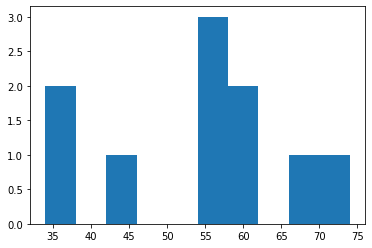

In [ ]:
# extract and plot memory scores
plt.hist(data['Memory score']);

We will see how to create and embellish these and other plots in the next section.

---

<a name="Visualisations"></a>
## 4. **Visualisations**

**IMPORTANT**: before looking at any plot, make sure you have imported the key packages in Step 1 and run all the 83 'cells hidden' in this section (*4. Visualisations*) once collapsed. This will avoid errors and should take a couple of seconds.

<a name="Histograms"></a>
### **Histograms**

In psychology we are often assuming that variables are normally distributed, and histograms are one of the easiest ways to 'eye-ball' normality.

First we simulate some data. Let's imagine we collected data on a memory test for 1000 healthy individuals, and the test had a minimum score of 0 and a maximum of 100. Because the participants are healthy, we can expect that most performed well on the test, so let's say that the sample had a mean score of 80 and that there was some variance, with a standard deviation of 5.

Here's the code.

In [ ]:
# set seed for reproducibility
np.random.seed(0)

# generate memory data by sampling 1000 values at random from
# a normal (Gaussian) distribution with M=70 and SD=5
healthy_data = np.random.normal(70, 5, 1000)

A simple histogram can be created in one line of code by specifying our data to the function `plt.hist`.

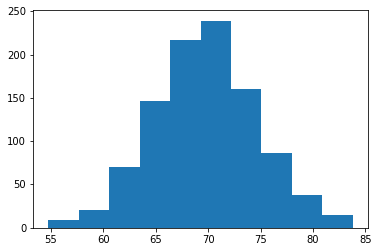

In [ ]:
# plot healthy data as a histogram
plt.hist(healthy_data);

We notice that this is a slight misrepresentation of our data since it doesn't show all the range of possible scores on the test. We can correct this by specifying the $x$ axis limits with the method `plt.xlim`.

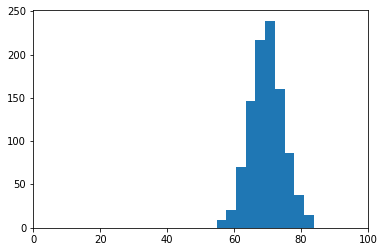

In [ ]:
# plot data as a histogram
plt.hist(healthy_data)

# set x axis limits
plt.xlim(0, 100);

Building on the above code, let's label our axes with a specific font size, using `plt.xlabel` and `plt.ylabel`.

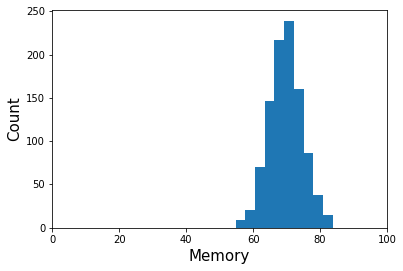

In [ ]:
# plot data as a histogram
plt.hist(healthy_data)

# set x axis limits
plt.xlim(0, 100)

# label axes 
plt.xlabel('Memory', fontsize = 15)
plt.ylabel('Count', fontsize = 15);

That's a good start, but we can do much better. The function `plt.hist` has, like all plots, a number of built-in features that we can modify, such as colour, number of bins, type of histogram, and many others.

The number of bins, in particular, is an important parameter when making a histogram. If the number of bins is too high, then the distribution will have many peaks and might make it difficult to see trends in the data. On the other hand, if the number of bins is too low, important details in the data might be hidden. It is therefore always a good idea to try multiple number of bins to find the right balance.

In the code below, we set the number of bins to 30, select a 'stepfilled' histogram, normalise it (such that the area under the curve integrates to 1), colour it in blue, and halve its transparency (alpha).

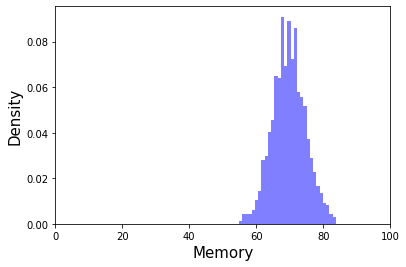

In [ ]:
# plot histogram with specific features
plt.hist(healthy_data, bins = 30, histtype = 'stepfilled', density = True,
         color = 'blue', alpha = 0.5)

# set x axis limits
plt.xlim(0, 100)

# label axes
plt.xlabel('Memory', fontsize = 15)
plt.ylabel('Density', fontsize = 15);

It's a good idea to take a look at the [histogram documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) and try to modify the code above to see what different features do.

To see how different parameters of the normal distribution affect its shape, manipulate the sliders in the interactive visualisation below, where *m* indicates the mean, *std* the standard deviation, and *N* the sample size. 

In [ ]:
# import interact function from ipywidgets
from ipywidgets import interact

# define a function returning a histogram with M, SD, and N as inputs
def histogram(m, std, N):
    plt.hist(np.random.normal(m, std, N), bins = 30, histtype = 'stepfilled',
             density = True, color = 'blue', alpha = 0.5)
    plt.xlim(0, 100)
    plt.xlabel('Memory', fontsize = 15)
    plt.ylabel('Density', fontsize = 15)
    
# create interactive sliders for each input to the function
interact(histogram, m = (0, 100, 10), std = (1, 10), N = (100, 1000, 100));

interactive(children=(IntSlider(value=50, description='m', step=10), IntSlider(value=5, description='std', max…

#### **Multiple histograms**

What if we were interested in comparing the distribution of *two* or more variables? We can use `plt.hist` to plot as many histograms as we want. Suppose, for example, that we also had memory data for a sample of dementia patients. Let's say that this sample had a mean score of 40 and was much more heterogeneous, with a standard deviation of 10.

In [ ]:
# generate dementia data by randomly sampling 1000 values
# from a normal distribution with M=40 and SD=10
dementia_data = np.random.normal(40, 10, 1000)

We can compare the distributions of the healthy and dementia groups on the same figure by plotting a histogram for each variable. We also include a legend by adding a label argument to `plt.hist` and using the `plt.legend` method. There are a number of features of the legend you can modify, such as the appearance of the box frame, location, marker scale, etc. For more information, see the [legend documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html).

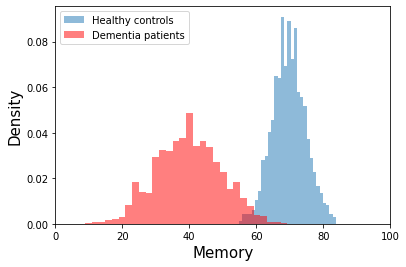

In [ ]:
# plot histogram of healthy controls
plt.hist(healthy_data, bins = 30, histtype = 'stepfilled', density = True,
         color = 'tab:blue', alpha = 0.5, label = 'Healthy controls')

# plot histogram of dementia patients
plt.hist(dementia_data, bins = 30, histtype = 'stepfilled', density = True,  
         color = 'red', alpha = 0.5, label = 'Dementia patients')

# set x axis limits
plt.xlim(0, 100)

# add axes labels and legend
plt.xlabel('Memory', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.legend();

>**Note**: when you use 2 or more colours, make sure to select colours that can be distinguished by colour-blind people, who represent at least [8% of the world population](https://www.nature.com/articles/nmeth.1618). A good idea is to include a brightness and/or texture contrast in addition to a colour contrast. Click [here](https://matplotlib.org/stable/gallery/color/named_colors.html) for a list of named colours with matplotlib.

Interact with the visualisation below to see how different means and standard deviations of the two samples might affect the results of a statistical comparison (*t*-test).

In [ ]:
# define a function returning two histograms with their Ms and SDs as inputs
def two_histograms(m1, std1, m2, std2):
    plt.hist(np.random.normal(m1, std1, 1000), bins = 30, histtype = 'stepfilled',
             density = True, color = 'tab:blue', alpha = 0.5,
             label = 'Healthy controls')
    plt.hist(np.random.normal(m2, std2, 1000), bins = 30, histtype = 'stepfilled',
             density = True, color = 'red', alpha = 0.5,
             label = 'Dementia patients')
    plt.xlim(0, 100);
    plt.xlabel('Memory', fontsize = 15)
    plt.ylabel('Density', fontsize = 15)
    plt.legend()
    
# create interactive sliders for each input to the function
interact(two_histograms, m1 = (0, 100, 10), std1 = (1, 10),
         m2 = (0, 100, 10), std2 = (1, 10));

interactive(children=(IntSlider(value=50, description='m1', step=10), IntSlider(value=5, description='std1', m…

You should notice that the two distributions can be difficult to distinguish if they are highly overlapping. We will next see how density plots are best suited for visualising this kind of distributions.

---

<a name="Density_plots"></a>
### **Density plots**

Another way of visualising distributions are density plots, probability curves estimated from the data. Precisely because they are estimated from data, density plots should be used only when you have enough data to produce a reliable distribution.

We can draw normal (Gaussian) density plots with the function `kdeplot` from [Seaborn](https://seaborn.pydata.org), a visualisation library built on top of [Matplotlib](https://matplotlib.org/stable/index.html). KDE stands for [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation), a common method for estimating probability distributions. Let's make a filled density plot with the memory data of healthy controls we generated for histograms.

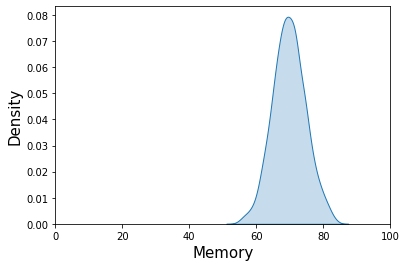

In [ ]:
# import seaborn library
import seaborn as sns

# plot probability density distribution of the healthy memory data
sns.kdeplot(healthy_data, fill = True, bw_adjust = 1)

# set x axis limits
plt.xlim(0, 100)

# label axes
plt.xlabel('Memory', fontsize = 15)
plt.ylabel('Density', fontsize = 15);

Density plots have an important parameter, called the bandwidth, that determines the 'smoothness' of the distribution. This is analogous to the number or width of bins for histograms: a high value will make the curve smoother but might obscure important features of the data, whereas a low value might produce misleading features dependent on the random variability in the data. To see this, try to change the value of the `bw_adjust` parameter in the code above.

We could also overlay a non-filled density plot on a histogram, as below.

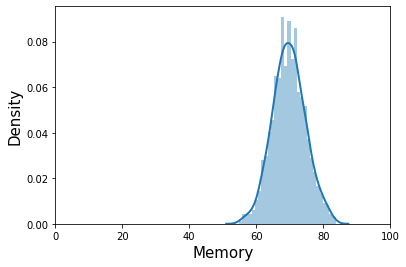

In [ ]:
# plot histogram of the healthy group
plt.hist(healthy_data, bins = 30, histtype = 'stepfilled', density = True,
         color = 'tab:blue', alpha = 0.4)

# plot density distribution of the same data
sns.kdeplot(healthy_data, linewidth = 2)

# set x axis limits
plt.xlim(0, 100)

# label axes
plt.xlabel('Memory', fontsize = 15)
plt.ylabel('Density', fontsize = 15);

Density plots become superior to histograms when we want to visualise overlapping distributions, since they are less visually cluttered. Let's plot the densities of the healthy and dementia groups, but this time we'll lower the mean and increase the variance of the healthy group to make the groups overlap more.

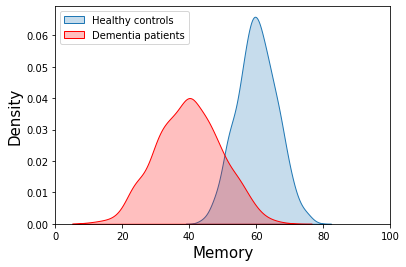

In [ ]:
# regenerate data for healthy controls with M=60 and SD=6
healthy_data = np.random.normal(60, 6, 1000)

# plot density of the healthy data
sns.kdeplot(healthy_data, fill = True, label = 'Healthy controls')

# plot density of the dementia data
sns.kdeplot(dementia_data, fill = True, label = 'Dementia patients',
            clip = [5, 80], color = 'red')

# set x axis limits
plt.xlim(0, 100)

# add axes labels and legend
plt.xlabel('Memory', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.legend(loc = 'upper left');

It is important to note that density plots can estimate non-sensical data or values that do not make sense according to your measure. This problem might have arisen for our highly variable dementia sample, with values below 0. To avoid this, we used the argument `clip` to specify the interval over which we want the probability density to be estimated. See the [kdeplot documentation](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) for other features.

---

<a name="Scatterplots"></a>
### **Scatterplots**

Scatterplots allow us to visualise the relationship between two variables.

To illustrate scatterplots, we will reproduce some findings from a super-cool recent study by [Lydon-Staley and colleagues (2020)](https://www.nature.com/articles/s41562-020-00985-7). The researchers monitored participants exploring Wikipedia pages 15 min a day for a period 3 weeks. Using tools from graph theory, they quantified the Wikipedia search of each individual as a *network*, with points representing Wikipedia pages, and connections representing the similarity between different pages. They then looked at how the *structure* of these networks was related to a trait called deprivation curiosity, indicating how much people are curious because they feel they 'have to know'. In other words, the question they were interested in was: does people's curiosity reflect the way in which they explore Wikipedia?

One finding was that people high on deprivation curiosity tended to explore more similar Wikipedia pages. In other words, the more curious people were, the more similar Wikipedia pages (and therefore concepts) they tended to explore - not so suprising if you think about it. Let's first reproduce these two variables - deprivation curiosity and similarity of Wikipedia pages.

In [ ]:
# generate deprivation curiosity scores from a normal distribution
deprivation_curiosity = np.random.normal(size = 150)

# create normally distributed noise to correlate variables
noise = np.random.normal(size = 150)

# generate positively correlated mean similarity of Wikipedia pages with noise
mean_concept_similarity = deprivation_curiosity + 5 * noise

To plot these two variables against each other in a scatterplot, we use the function `plt.scatter`. The first input represents the variable on the $x$ axis, and the second the variable on the $y$ axis. As always, we add axes labels.

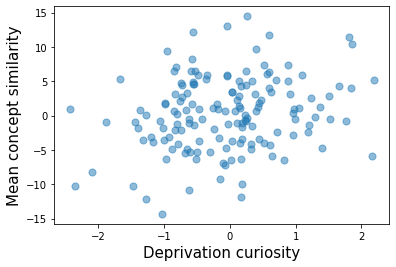

In [ ]:
# plot variables in a scatterplot
plt.scatter(deprivation_curiosity, mean_concept_similarity, s = 50, alpha = 0.5)

# label axes
plt.xlabel('Deprivation curiosity', fontsize = 15)
plt.ylabel('Mean concept similarity', fontsize = 15);

There are a number of features that you can modify. One characteristic feature of the scatterplot we illustrated here is the size of the dots, specified by `s`. Play around with this value to see the effect and look at the [scatterplot documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to learn about other features. See also [this](https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_symbol.html) for fun.

We also often want to fit a least-squares regression line to the data. There are different ways to do this; the easiest is to use the seaborn function `regplot`, which has the bonus of displaying 95% confidence bands by default. Here's the code.

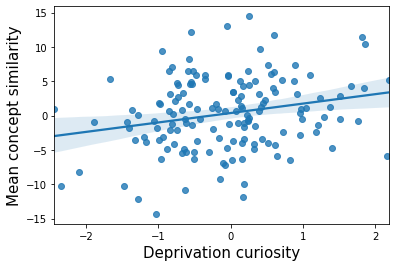

In [ ]:
# import seaborn library
import seaborn as sns

# create scatterplot with regression line
sns.regplot(x = deprivation_curiosity, y = mean_concept_similarity)

# label axes
plt.xlabel('Deprivation curiosity', fontsize = 15)
plt.ylabel('Mean concept similarity', fontsize = 15);

For more on the `regplot` function, see the [documentation](https://seaborn.pydata.org/generated/seaborn.regplot.html).

A related finding of the study was that the Wikipedia network of people high on deprivation curiosity tended to a have a lower average path length. That is, for more curious people, all the Wikipedia pages they visited were on average less distant from each other. We generate this variable (mean path length) and plot it against deprivation curiosity, also with a regression line.

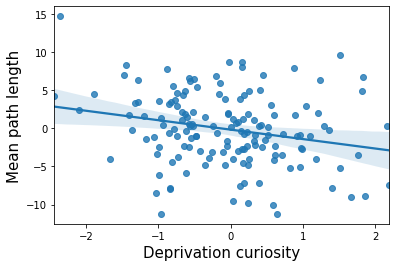

In [ ]:
# generate negatively correlated mean path length of Wikipedia pages
noise = np.random.normal(size = 150)
mean_pathlength = - deprivation_curiosity + 5 * noise

# create scatterplot with regression line
sns.regplot(x = deprivation_curiosity, y = mean_pathlength)

# label axes
plt.xlabel('Deprivation curiosity', fontsize = 15)
plt.ylabel('Mean path length', fontsize = 15);

---

#### **Multipanel figures** <a class="anchor" id="Multipanel"></a>

What if we wanted to display more than one plot in a figure? There are different ways to do this. If we are working with a few plots all of the same size, then the function `plt.subplot` is best. This function takes three integer inputs: the first specifies the number of rows, the second the number of columns, and the third the panel or subplot currently selected (from top left to bottom right).

Because deprivation curiosity is on the $x$ axis in both figures, it's most elegant to put the plots one below the other. We therefore specify 2 rows and 1 column to `plt.subplot`.

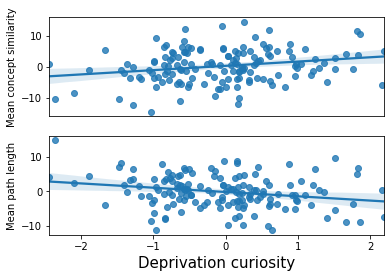

In [ ]:
# create two subplots (one below the other) and select the first one
plt.subplot(2, 1, 1)

# create and label the first scatterplot with regression line
sns.regplot(x = deprivation_curiosity, y = mean_concept_similarity)
plt.ylabel('Mean concept similarity', fontsize = 10)

# remove x ticks of the first scatterplot
plt.xticks([])

# select the second subplot
plt.subplot(2, 1, 2)

# create and label the second scatterplot with regression line
sns.regplot(x = deprivation_curiosity, y = mean_pathlength)
plt.xlabel('Deprivation curiosity', fontsize = 15)
plt.ylabel('Mean path length', fontsize = 10);

Note that you could embed any plot - not just scatterplots - and any number of them in [subplots](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html).

---

<a name="Bar_plots"></a>
### **Bar plots**

Bar graphs are one of the most common plots used in psychology and other fields for comparing different groups or conditions (e.g. drug vs placebo).

To make a bar graph, you don't need to load any data unless you want to carry out the analyses here (which you could do if you want) or overlay the individual observations on the bars (we'll see how to do this for [line](#Line_plots) and [violin plots](#Violin_plots)). You can compute the stats in a standard software such as SPSS (Statistical Package for the Social Sciences) and then use them as inputs to the function `plt.bar`, as we'll see below.

We will illustrate this type of plot with data from a recent study by [Iwamoto et al. (2020)](https://www.nature.com/articles/s41598-020-62652-1#:~:text=Here%20we%20examined%20whether%20mindfulness,a%20component%20of%20social%20cooperation.&text=Subjects%20who%20underwent%20the%20meditation,after%20controlling%20for%20socio%2Ddemographics.). The researchers investigated the impact of a brief online mindfulness intervention on altruism. Participants were compensated for their participation, and altruism was measured by the percentage of compensation they were willing to donate to a charity. The researchers also looked at whether education made a difference (i.e., whether there was an interaction between education and treatment). We will start by getting the means (*Ms*) and standard errors (*SEs*) from the results section of the paper. 

In [ ]:
# Ms and SEs of % payoff donated in the meditation group
# with non-educated first and educated second
mean_meditation = [11.25, 10.65]
se_meditation = [2.05, 1.37]

# Ms and SEs of % payoff donated in the control group
mean_control = [1.25, 7.57]
se_control = [0.38, 1.18]

Next, we define three key things that we will need to make our bar graph:
* the $x$ axis labels,
* the location of those labels, and
* the width of the bars.

To define the location of the labels, we first use the built-in Python function `len`, which as the name suggests gives us the length of an object (in this case 2). The result is fed as an input to the numpy function `arange` that returns a sequence of numbers from 0 to an upper bound (in this case 2) excluding the upper bound, in default steps of 1. This means that the labels on the $x$ axis will be at location 0 and 1.

In [ ]:
# set the x axis labels
labels = ['no college', 'attended college']

# set the labels' locations
labels_loc = np.arange(len(labels))

# set the width of the bars
width = 0.35

We can then plot the means of each treatment group (control vs meditation) as bars by using `plt.bar` (see the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)), with the help of the previously specified inputs. We also add axes limits, labels and a legend.

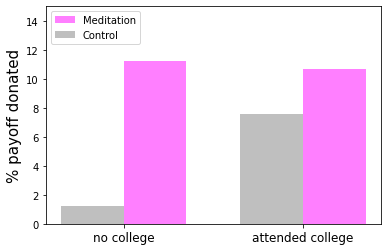

In [ ]:
# plot the means of the meditation and control groups as bars
plt.bar(labels_loc + width/2, mean_meditation, width, color = 'magenta',
        alpha = 0.5, label = 'Meditation')

plt.bar(labels_loc - width/2, mean_control, width, color = 'grey',
        alpha = 0.5, label = 'Control')

# add axes limits, labels and legend
plt.ylim(0, 15)
plt.ylabel('% payoff donated', fontsize = 15)
plt.xticks(labels_loc, labels, fontsize = 12)
plt.legend(loc = 'upper left');

Now we have only the standard errors left to plot as error bars. For this, we can use the function `plt.errorbar`, which has 3 key inputs. The first two are the $x$ and $y$ coordinates of the points (where you want the error bars), and the third consists of the error bars themselves (i.e., their length), specified here by `yerr` because we want them plotted vertically, parallel to the $y$ axis. If you wanted the error bars plotted horizontally, along the $x$ axis (as in [forest plots](https://en.wikipedia.org/wiki/Forest_plot)), you would use `xerr`. We also modify various aesthetic features of the error bars, including their width, 'capsize', and colour (see the [error bar documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html)).

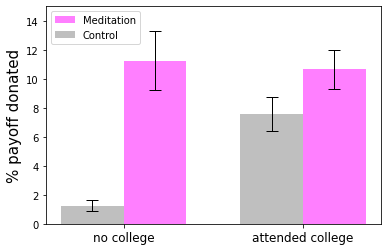

In [ ]:
# plot the means of the meditation and control groups as bars
plt.bar(labels_loc + width/2, mean_meditation, width, color = 'magenta',
        alpha = 0.5, label = 'Meditation')

plt.bar(labels_loc - width/2, mean_control, width, color = 'grey',
        alpha = 0.5, label = 'Control')

# plot the standard errors of both groups as error bars
plt.errorbar(labels_loc + width/2, mean_meditation, yerr = se_meditation,
             linestyle = '', elinewidth = 1, capsize = 6, color = 'k')

plt.errorbar(labels_loc - width/2, mean_control, yerr = se_control,
             linestyle = '', elinewidth = 1, capsize = 6, color = 'k')

# add axes limits, labels and legend
plt.ylim(0, 15)
plt.ylabel('% payoff donated', fontsize = 15)
plt.xticks(labels_loc, labels, fontsize = 12)
plt.legend(loc = 'upper left');

We can clearly see that the brief online meditation exercise increased people's altruism, or at least their willingness to donate their compensation to a charity. And interestingly, even though people who did not go to college were substantially less altruistic at baseline compared to those who did, their altruism increased as high as that of the other group after the meditation exercise.

---

<a name="Coding_design"></a>
#### **Coding your own design**

What if you had more than 2 independent variables (IVs) and/or IVs with more than 2 levels? You can implement your own factorial design by tweaking the code above. To see how, we will look again at how we coded the design of our example bar plot, but note that this guide applies to all plots of means and some error measure (e.g. line graphs).

In [ ]:
# Ms and SEs of meditation group
# with non-educated first, educated second
mean_meditation = [11.25, 10.65]
se_meditation = [2.05, 1.37]

# Ms and SEs of control group
mean_control = [1.25, 7.57]
se_control = [0.38, 1.18]

This was a 2x2 design, with one IV being treatment (meditation vs control) and the other being education (no colleged vs attended college). If you wanted to add one or more IVs, you would need to expand the above data arrays (*Ms* and *SEs*) for both groups by the number of levels of the new IV(s).

For example, [Iwamoto et al. (2020)](https://www.nature.com/articles/s41598-020-62652-1#:~:text=Here%20we%20examined%20whether%20mindfulness,a%20component%20of%20social%20cooperation.&text=Subjects%20who%20underwent%20the%20meditation,after%20controlling%20for%20socio%2Ddemographics.) also looked at whether age interacted with the treatment, specifically whether there was a difference between those under and above 25 years. In other words, did people's altruism differ depending on whether they were under or above 25? This is how we would incorporate this new variable into the design.

In [ ]:
# Ms and SEs of meditation group
# under 25 years old third, and above 25 fourth
mean_meditation = [11.25, 10.65, 6.2, 10.65]        
se_meditation = [2.05, 1.37, 1.66, 1.37]

# Ms and SEs of control group
mean_control = [1.25, 7.57, 0.12, 7.57]
se_control = [0.38, 1.18, 0.02, 1.18]

As you can see, we simply expanded the *Ms* and *SEs* by two columns, corresponding to the levels of our new variable age (under 25 vs above 25). This makes the design 2x2x2 - 3 IVs, each with two levels. To remake our bar graph, we only need to expand the $x$ labels (with the age levels) and readjust the size of our error bars to account for the squeezing of the bars in the figure. (Alternatively, we could change the size of the figure, but we'll assume that we want to keep the it constant.)

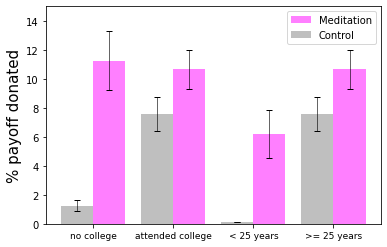

In [ ]:
# set x axis labels
labels = ['no college', 'attended college', '< 25 years', '>= 25 years']

# set labels' locations
labels_loc = np.arange(len(labels))

# set bar width
width = 0.4

# plot the means of the meditation and control groups as bars
plt.bar(labels_loc + width/2, mean_meditation, width, color = 'magenta',
        alpha = 0.5, label = 'Meditation')
plt.bar(labels_loc - width/2, mean_control, width, color = 'grey',
        alpha = 0.5, label = 'Control')

# plot the standard errors of both groups as error bars
plt.errorbar(labels_loc + width/2, mean_meditation, yerr = se_meditation,
             linestyle = '', elinewidth = 0.6, capsize = 3, color = 'k')
plt.errorbar(labels_loc - width/2, mean_control, yerr = se_control,
             linestyle = '', elinewidth = 0.6, capsize = 3, color = 'k')

# add axes limits, labels and legend
plt.ylim(0, 15)
plt.ylabel('% payoff donated', fontsize = 15)
plt.xticks(labels_loc, labels, fontsize = 9)
plt.legend(loc = 'upper right');

What about IVs with more than 2 levels? This depends on the specific variable you want to add levels to. If it's one of the variables displayed on the $x$ axis (in this case education and age), then you can do as before and expand the data arrays by adding another education or age group. If it's the colour-coded variable (in this case treatment), then you would need to define another set of arrays, one with the means and one with some error measure.

To see this, let's return to our original design and suppose that, in addition to the meditation and control groups, there was also a relaxation group, performing a breathing exercise. We would write the following code.

In [ ]:
# Ms and SEs of meditation group
mean_meditation = [11.25, 10.65]
se_meditation = [2.05, 1.37]

# Ms and SEs of control group
mean_control = [1.25, 7.57]
se_control = [0.38, 1.18]

# Ms and SEs of relaxation group
mean_relaxation = [7.41, 8.29]
se_relaxation = [1, 1.5]

# add as many groups as you want
...;

This would now be a 3x2 design - 2 IVs, one with 3 levels (treatment: meditation vs control vs breathing) and one with 2 levels (education: no college vs college). To replot our bar graph, we need to add a bar and error bar for our new relaxation group. We also need to adjust the bar width and the positions of the bars and error bars (compare the code above with the one below to see the differences). The code starts looking much busier, but note that we are simply repeating the same operations for each group.

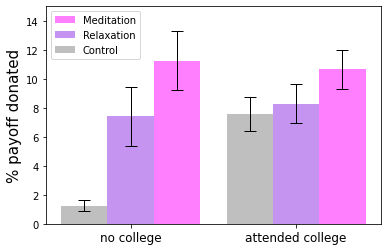

In [ ]:
# set x axis labels
labels = ['no college', 'attended college']

# set labels' locations
labels_loc = np.arange(len(labels))

# se# set bar width
width = 0.28

# plot the means of the meditation, relaxation and control groups as bars
plt.bar(labels_loc + width, mean_meditation, width, color = 'magenta',
        alpha = 0.5, label = 'Meditation')
plt.bar(labels_loc, mean_relaxation, width, color = 'blueviolet',
        alpha = 0.5, label = 'Relaxation')
plt.bar(labels_loc - width, mean_control, width, color = 'grey',
        alpha = 0.5, label = 'Control')

# plot the standard errors of all groups as error bars
plt.errorbar(labels_loc - width, mean_control, yerr = se_control,
             linestyle = '', elinewidth = 1, capsize = 6, color = 'k')
plt.errorbar(labels_loc, mean_relaxation, yerr = se_meditation,
             linestyle = '', elinewidth = 1, capsize = 6, color = 'k')
plt.errorbar(labels_loc + width, mean_meditation, yerr = se_meditation,
             linestyle = '', elinewidth = 1, capsize = 6, color = 'k')

# add axes limits, labels and legend
plt.ylim(0, 15)
plt.ylabel('% payoff donated', fontsize = 15)
plt.xticks(labels_loc, labels, fontsize = 12)
plt.legend(loc = 'upper left');

Using this method, you can code and visualise your own factorial design, with as many variables and levels as required.

---

<a name="Line_plots"></a>
### **Line plots**

Line graphs are generally used to represent variables as a function of time, be it measured discretely in a longitudinal study or continuously in an electrophysiological experiment. In the latter case, line plots are also known as time series.

We will illustrate this plot with data from a  recent randomised controlled trial of psychedelic-assisted therapy for major depression by [Davis et al. (2020)](https://jamanetwork.com/journals/jamapsychiatry/fullarticle/2772630) - which showed truly remarkable results. After a detailed screening, participants were randomly assigned to either a treatment group, who received the psychedelic psilocybin and therapy, or a control group who received a delayed treatment. Depressive symptoms were assessed at three distinct time points: baseline, week 5, and week 8 (relative to the control group).

We start by taking from the paper the means (*Ms*) and standard deviations (*SDs*) of the depression scores for both groups, at each time point.

In [ ]:
# Ms and SDs of depressive scores of psilocybin group across time
# (baseline, week 5, and week 8)
mean_depression_psi = np.array([22.9, 8, 8.5])
std_depression_psi = np.array([3.6, 7.1, 5.7])

# Ms and SDs of depressive scores of control group across time
mean_depression_control = np.array([22.5, 23.8, 23.5])
std_depression_control = np.array([4.4, 5.4, 6])

To make a line plot of these data, we first define the time points for both locating the labels and plotting the error bars, similarly to how we set the $x$ labels for bar plots. Here we define 0 for baseline, 1 for week 5, and 2 for week 8. We can then plot the *Ms* and *SDs* of the depression scores at each time point with `plt.errorbar` (see the [bar plots](#Bar_plots) section for a brief explanation of this function). 

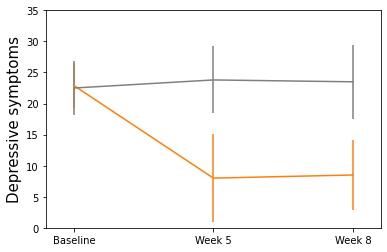

In [ ]:
# define timepoints for labels and error bars
timepoints = np.array([0, 1, 2])

# plot Ms and SDs of depression scores for psilocybin group
plt.errorbar(timepoints, mean_depression_psi, yerr = std_depression_psi,
             color = 'tab:orange')

# plot Ms and SDs of depression scores for control group
plt.errorbar(timepoints, mean_depression_control, yerr = std_depression_control,
             color = 'tab:grey')

# set axes limits and labels
plt.ylim(0, 35)
plt.xlim(-0.2, 2.2)
plt.ylabel('Depressive symptoms', fontsize = 15)
plt.xticks(timepoints, ['Baseline', 'Week 5', 'Week 8']);

We can clearly see that there was no difference between the two groups at baseline, as one would expect. But at week 5 (corresponding to week 1 for the treatment group), the psilocybin group showed a substantial reduction in depressive symptoms compared to the control group, with an effect size of more than 2 standard deviations in fact. This difference was still present at week 8 (week 4 for the treatment group).

It is important to remember that the lines do not represent any real data in this graph. Depressive symptoms were assessed in both groups only at three time points, so we do not know what the symptoms were between any two time points (e.g. between baseline and week 5). One possibility, for example, is that the symptoms dropped at week 1 and remained constant until week 5, instead of gradually decreasing over time. Bearing that in mind, we use lines to represent discrete time data because they help us visualise and compare the time evolution of depressive symptoms across the two groups.

We now embellish the plot by modifying a number of features, both standard and characteristic of `errorbar` (see the
[documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html)). We specify points as markers, the size of the points, and the width of the error bars' caps, among other things. We also add horizontal line grids with the function `plt.grid` to facilitate visual comparisons.

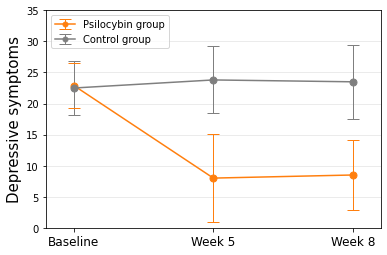

In [ ]:
# plot psilocybin group data
plt.errorbar(timepoints, mean_depression_psi, yerr = std_depression_psi, 
             marker = 'o', markersize = 7, elinewidth = 1, capsize = 6,
             color = 'tab:orange', label = 'Psilocybin group')

# plot control group data
plt.errorbar(timepoints, mean_depression_control, yerr = std_depression_control, 
             marker = 'o', markersize = 7, elinewidth = 1, capsize = 6,
             color = 'tab:gray', label = 'Control group')

# set axes limits
plt.ylim(0, 35)
plt.xlim(-0.2, 2.2)

# add labels, legend and horizontal grid lines
plt.ylabel('Depressive symptoms', fontsize = 15)
plt.xticks(timepoints, ['Baseline', 'Week 5', 'Week 8'], fontsize = 12)
plt.legend(markerscale = 0.7)
plt.grid(axis = 'y', alpha = 0.3)

This is a nice figure, but we could do even better by plotting the depression scores of each individual, in each group, at each time point. Although the authors did not display individual scores in their graphs, it could be argued that they would have been useful, especially in a treatment study where every individual matters. We will generate the individual scores ourselves from normal distributions with the given *Ms* and *SDs* and the sample size of the study (*N* = 13). We also set a particular 'seed' for the (pseudo)random number generator to ensure that the same random result is generated every time this code is run.

In [ ]:
# set seed for reproducibility
np.random.seed(7)

# generate data for psilocybin group across time
base_psi = np.random.normal(22.9, 3.6, 13)
week5_psi = np.random.normal(8, 7.1, 13)
week8_psi = np.random.normal(8.5, 5.7, 13)

# generate data for control group across time
base_control = np.random.normal(22.5, 4.4, 13)
week5_control = np.random.normal(23.8, 5.4, 13)
week8_control = np.random.normal(23.5, 6, 13)

Now we can overlay the individual data points on the line graph simply by using the function `scatter` (see the [scatterplots section](#Scatterplots)). To avoid plotting completely overlapping points, we use the numpy function `linspace`, which takes three key inputs: a starting value, a stop value, and a step value (see the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). The function returns evenly spaced values between the starting and stopping values, in given steps. Here, because there are 13 individual scores, we set a step value of 13.

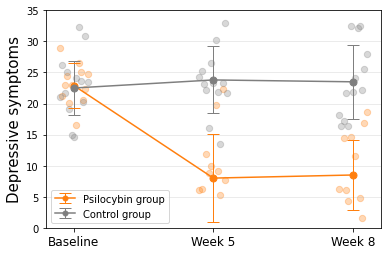

In [ ]:
# plot Ms and SDs of psilocybin group
plt.errorbar(timepoints, mean_depression_psi, yerr = std_depression_psi, 
             marker = 'o', markersize = 7, elinewidth = 1, capsize = 6,
             color = 'tab:orange', label = 'Psilocybin group')

# scatter points of psilocybin group
plt.scatter(np.linspace(-0.1, 0.1, 13), base_psi, color = 'tab:orange',
            alpha = 0.3, s = 40)
plt.scatter(np.linspace(0.9, 1.1, 13), week5_psi, color = 'tab:orange',
            alpha = 0.3, s = 40)
plt.scatter(np.linspace(1.9, 2.1, 13), week8_psi, color = 'tab:orange',
            alpha = 0.3, s = 40)

# plot Ms and SDs of control group
plt.errorbar(timepoints, mean_depression_control, yerr = std_depression_control, 
             marker = 'o', markersize = 7, elinewidth = 1, capsize = 6,
             color = 'tab:gray', label = 'Control group')

# scatter points of control group
plt.scatter(np.linspace(-0.1, 0.1, 13), base_control, color = 'tab:grey',
            alpha = 0.3, s = 40)
plt.scatter(np.linspace(0.9, 1.1, 13), week5_control, color = 'tab:grey',
            alpha = 0.3, s = 40)
plt.scatter(np.linspace(1.9, 2.1, 13), week8_control, color = 'tab:grey',
            alpha = 0.3, s = 40)

# set axes limits
plt.ylim(0, 35)
plt.xlim(-0.2, 2.2)

# add labels, legend and horizontal grid lines
plt.ylabel('Depressive symptoms', fontsize = 15)
plt.xticks(timepoints, ['Baseline', 'Week 5', 'Week 8'], fontsize = 12)
plt.legend(markerscale = 0.7)
plt.grid(axis = 'y', alpha = 0.3)

The utility of showing individual scores is clear. For example, we can see that, despite the two groups being on average very different in terms of depressive symptoms at week 5, two individuals in the psilocybin group have a depression score within one standard deviation of the control group. (Note that these data points are randomly generated and do not reflect those of the study.) 

You could also overlay individual observations on bar plots and indeed any plot where it might be useful to visualise them. This is often the case in psychology, where we are as interested in general patterns as in individual differences and heterogeneity.

This study had a 2x3 design, with one IV being treatment (psilocybin vs control) and the other being time (baseline vs week 5 vs week 8). What if you had more than 2 IVs and/or IVs with more or less than 3 levels? See [Coding your own design](#Coding_design) under the bar plots section.

---

<a name="Violin_plots"></a>
### **Violin plots**

Violin plots are often preferred over bar and line plots because they display the full distribution of the data (and are therefore also more informative than box plots).

Indeed, despite being some of the most popular graphs, bar and line plots have recently come under a lot of criticism (e.g. [Weissgerber et al., 2015](https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.1002128)), leading to even a "[bar bar plot](https://www.kickstarter.com/projects/1474588473/barbarplots)" t-shirt campaign on Kickstarter. Bar plots can distort differences between groups or conditions and obscure the underlying distribution of the data, including the presence of outliers. This means, for example, that the same bar can be produced by different distributions.

The violin plot addresses these issues by plotting a probability density of the data. It is essentially a [density plot](#Density_plots) rotated by 90 degrees and mirrored to create a violin-like shape. To illustrate violin plots, we will generate similar data that we used for histograms, with memory scores for healthy controls and dementia patients. We'll also add a group of memory champions. 

In [ ]:
# set random seed for reproducibility
np.random.seed(40)

# generate healthy memory data by randomly sampling 50 values
# from a normal distribution with M=70 and SD=8
healthy_data = np.random.normal(70, 8, 50)

# generate dementia data by randomly sampling 50 values
# from a normal distribution with M=40 and SD=12
dementia_data = np.random.normal(40, 12, 50)

# generate memory champions data by randomly sampling 50 values
# from a normal distribution with M=85 and SD=3
champions_data = np.random.normal(85, 3, 50)

As with bar and line plots, we start by defining the location of the $x$ labels and violins. We then plot a 'violin' for each group with the function `plt.violinplot`, specifying its location, width, and the bandwidth parameter that we discussed under [density plots](#Density_plots). See the [violinplot documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.violinplot.html) for other features.

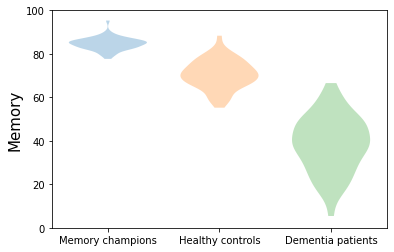

In [ ]:
# define x labels' locations
labels_loc = np.array([0.5, 1.5, 2.5])

# plot memory champions data as a violin
violin1 = plt.violinplot(champions_data, positions = [labels_loc[0]],
                         widths = 0.7, showextrema = False, bw_method = 0.4)

# plot healthy controls data as a violin
violin2 = plt.violinplot(healthy_data, positions = [labels_loc[1]],
                         widths = 0.7, showextrema = False, bw_method = 0.4)
    
# plot dementia patients data as a violin
violin3 = plt.violinplot(dementia_data, positions = [labels_loc[2]],
                         widths = 0.7, showextrema = False, bw_method = 0.4)

# set axes limits and labels
plt.ylim(0, 100)
plt.xlim(0, 3)
plt.ylabel('Memory', fontsize = 15);
plt.xticks(labels_loc, ['Memory champions', 'Healthy controls', 'Dementia patients'],
           fontsize = 10);

We are not happy with the default colours. Changing the colours of violin plots is slightly more complicated compared to other plots, as there is no colour argument that we can specify within the function. Instead, colours for the face, edge, and other features of the violin plot are stored in a *dictionary*, a data object consisting of keys and values. Here the keys correspond to colour features (e.g. face colour), and values to the actual colours (e.g. blue). To change a particular colour feature, we therefore need to change its value. We can do this with a *for loop*, an object repeatedly executing some code over a specified number of values or elements.

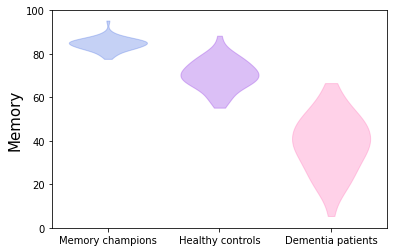

In [ ]:
# violin for memory champions
violin1 = plt.violinplot(champions_data, positions = [labels_loc[0]],
                         widths = 0.7, showextrema = False, bw_method = 0.5)

# set colour of the memory champions's violin
for element in violin1['bodies']:
    element.set_color('royalblue')

# violin for healthy controls
violin2 = plt.violinplot(healthy_data, positions = [labels_loc[1]],
                         widths = 0.7, showextrema = False, bw_method = 0.5)

# set colour of the healthy controls' violin
for element in violin2['bodies']:
    element.set_color('blueviolet')
    
# violin for dementia patients
violin3 = plt.violinplot(dementia_data, positions = [labels_loc[2]],
                         widths = 0.7, showextrema = False, bw_method = 0.5)

# set colour of the violin the memory champions' violin
for element in violin3['bodies']:
    element.set_color('hotpink')

# set axes limits and labels
plt.ylim(0, 100)
plt.xlim(0, 3)
plt.ylabel('Memory', fontsize = 15);
plt.xticks(labels_loc, ['Memory champions', 'Healthy controls', 'Dementia patients'],
           fontsize = 10);

We can overlay the individual observations on the 'violins' with the `scatterplot` function (see the [scatterplots](#Scatterplots) section), just as we did for the line plot. The resulting plot is sometimes called a sina plot.

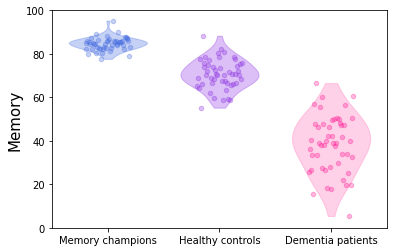

In [ ]:
# violin for memory champions
violin1 = plt.violinplot(champions_data, positions = [labels_loc[0]],
                         widths = 0.7, showextrema = False, bw_method = 0.5)
for element in violin1['bodies']:
    element.set_color('royalblue')

# violin for healthy controls
violin2 = plt.violinplot(healthy_data, positions = [labels_loc[1]],
                         widths = 0.7, showextrema = False, bw_method = 0.5)
for element in violin2['bodies']:
    element.set_color('blueviolet')
    
# violin for dementia patients
violin3 = plt.violinplot(dementia_data, positions = [labels_loc[2]],
                         widths = 0.7, showextrema = False, bw_method = 0.5)
for element in violin3['bodies']:
    element.set_color('hotpink')

# scatter points on top of the violins
plt.scatter(np.linspace(0.3, 0.7, 50), champions_data, alpha = 0.3, s = 20,
            color = 'royalblue')
plt.scatter(np.linspace(1.3, 1.7, 50), healthy_data, alpha = 0.3, s = 20,
            color = 'blueviolet')
plt.scatter(np.linspace(2.3, 2.7, 50), dementia_data, alpha = 0.3, s = 20,
            color = 'deeppink')
    
# set axes limits and labels
plt.ylim(0, 100)
plt.xlim(0, 3)
plt.ylabel('Memory', fontsize = 15);
plt.xticks(labels_loc, ['Memory champions', 'Healthy controls', 'Dementia patients'],
           fontsize = 10);

We can again clearly see the utility of showing the individual scores of each group. We can see, for example, that the best-performing dementia patients have a memory score as high as the worst-performing healthy controls.

Another popular option is to overlay a boxplot on each violin with the function `plt.boxplot`. We create one boxplot for each group, specifying its position, width, and other features (see the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)). We change the colour of the median line to black in the same way we changed the colour of the violins - with a for loop. The code might appear daunting, but again we are simply repeating the same operations for each group.

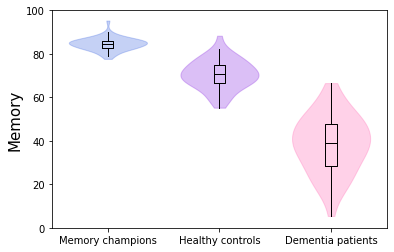

In [ ]:
# violin for memory champions
violin1 = plt.violinplot(champions_data, positions = [labels_loc[0]],
                         widths = 0.7,
                         showextrema = False, bw_method = 0.5)
for element in violin1['bodies']:
    element.set_color('royalblue')
    
# boxplot for memory champions
boxplot1 = plt.boxplot(champions_data, positions = [labels_loc[0]],
                       widths = 0.1, showcaps = False, showfliers = False)
for element in ['medians']:
        plt.setp(boxplot1[element], color = 'k')

        
# violin for healthy controls
violin2 = plt.violinplot(healthy_data, positions = [labels_loc[1]],
                         widths = 0.7, showextrema = False, bw_method = 0.5)
for element in violin2['bodies']:
    element.set_color('blueviolet')
  
# boxplot for healthy controls
boxplot2 = plt.boxplot(healthy_data, positions = [labels_loc[1]],
                       widths = 0.1, showcaps = False, showfliers = False)
for element in ['medians']:
    plt.setp(boxplot2[element], color = 'k')

    
# violin for dementia patients
violin3 = plt.violinplot(dementia_data, positions = [labels_loc[2]],
                         widths = 0.7, showextrema = False, bw_method = 0.5)
for element in violin3['bodies']:
    element.set_color('hotpink')

# boxplot for dementia patients
boxplot3 = plt.boxplot(dementia_data, positions = [labels_loc[2]],
                       widths = 0.1, showcaps = False, showfliers = False)
for element in ['medians']:
        plt.setp(boxplot3[element], color = 'k')

# set axes limits and labels
plt.ylim(0, 100)
plt.xlim(0, 3)
plt.ylabel('Memory', fontsize = 15);
plt.xticks(labels_loc, ['Memory champions', 'Healthy controls', 'Dementia patients'],
           fontsize = 10);

<a name="Exporting"></a>
## 5. **Exporting your figure**

Any figure can be saved in one line of code with the command `plt.savefig`. You simply specify the name you want to give to the file, with an extension indicating the file format (pdf, png, jpg, etc.) you want to save it as. It is generally best to save your figures as PDFs or other vector graphics because these do not lose resolution under different zooms (they literally rescale to keep the same resolution), unlike bitmap or pixel-based files such as PNG.

In [ ]:
# save figure as a pdf file
plt.savefig('your_filename.pdf');

>**Note**: the above line of code will not work here of course; you have to include and run it at the end of the code of the figure you want to save.

The figure will be saved in the *Files* folder of Colab (the same folder to which we uploaded our [example Excel file](#Loading_Excel_files)). To download the file, double click on it or click on the three vertical dots and select 'Download'.

See also the [savefig documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html) for its features, such as saving figures at a specific resolution.

---

<a name="Further_resources"></a>
## **Further resources**

Hopefully you found this tutorial useful and engaging (as engaging as coding can be). If you were new to programming, I hope that this notebook made you see the value of knowing how to code and how cool it can be (when it works; otherwise don't quote me).

The plots and features covered here are a just small fraction of the visualisations tools for Python available out there. Check out the [matplotlib documentation](https://matplotlib.org)
and the [matplotlib gallery](https://matplotlib.org/gallery.html), with code for almost every visualisation you can think of. See also the [seaborn gallery](http://seaborn.pydata.org/examples/index.html). A freely available textbook I found particularly useful is [*Fundamentals of Data Visualization*](https://clauswilke.com/dataviz/) by Claus Wilke. And of course, Google is your best friend. If you have a problem, chances are that someone else encountered a similar or even the same problem. Ultimately, great programmers are just really good at googling and problem-solving.

If you are interested in learning to seriously code in Python, starting from the very basics, there is a plethora of online resources, including courses, textbooks, and dedicated websites. These should get you started:

* [the Python Tutorial](https://docs.python.org/3/tutorial/)
* [freeCodeCamp](https://www.freecodecamp.org)
* [Code Academy](https://www.codecademy.com)
* [DataCamp](https://www.datacamp.com)
* the [scipy lecture notes](https://scipy-lectures.org)
* the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/).

---